# **●はじめに**


「古典的な機械学習」「いわゆる深層学習」についてそれぞれ二回ずつ復習してきたが、今回はいよいよ生成AI（generative AI）について、その社会実装を念頭に学ぶこととする。

その際、生成AI（genAI）といっても様々な種類、アルゴリズムがある中、特に今回はもっとも頻用されている大規模言語モデル（large language model, LLM）を取上げ、とりわけそこで最も高性能でるとして注目され続けて来ているOpenAI社のGPTを用いることとする。

なお、画像生成という意味での生成AIについては確率的拡散モデル（Diffusion Probabilistic Model）が良く知られているが、これについては[こちらの書籍](https://www.iwanami.co.jp/book/b619864.html)を一読することを進める。

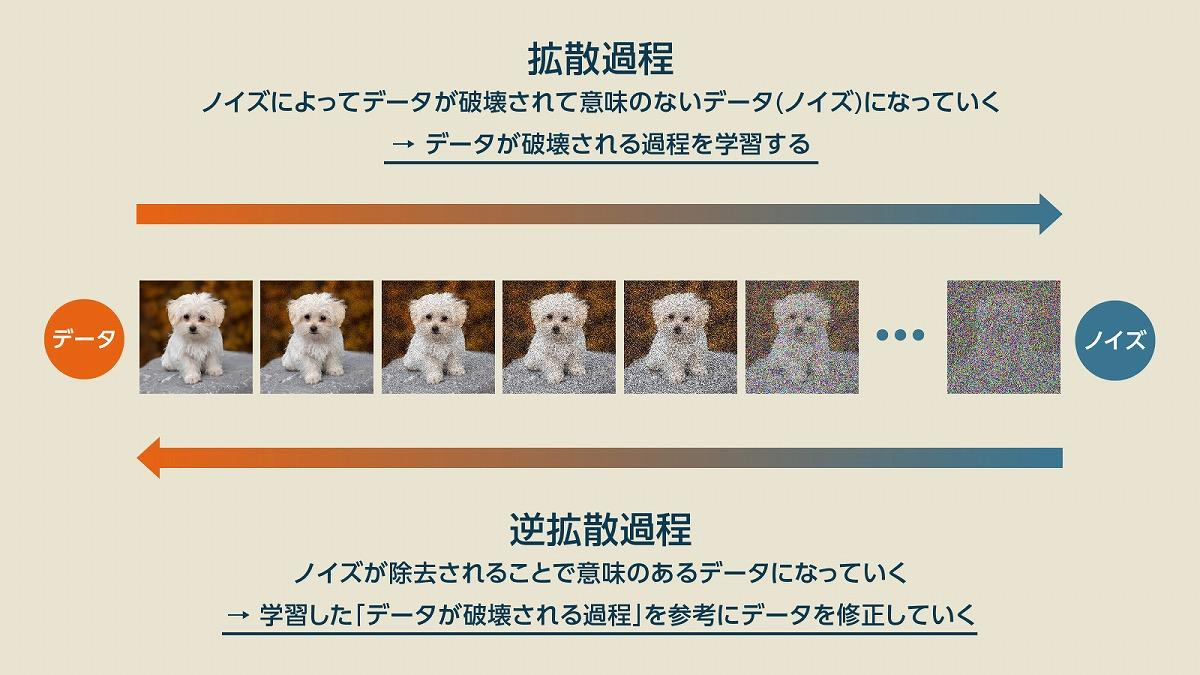



# **●大規模言語モデルとは何か**

大規模言語モデル（large language model, LLM)とは多数のパラメータ（数千万から数十億）を持つ人工ニューラルネットワークで構成されるコンピュータ言語モデルで、膨大なラベルなしテキストを使用して自己教師あり学習または半教師あり学習によって訓練が行われる。

LLMは2018年頃に登場し、さまざまなタスク（仕事）で優れた性能を発揮している。これにより、自然言語処理の研究の焦点は、特定のタスクに特化した教師ありモデルを訓練するという以前のパラダイムから転換した。大規模言語モデルの応用は目覚ましい成果を上げているが、大規模言語モデルの開発はまだ始まったばかりであり、多くの研究者が大規模言語モデルの改良に貢献している。

大規模言語モデルという用語の正式な定義はないが、大規模コーパスで事前訓練された、数百万から数十億以上のパラメータを持つディープラーニングモデルを指すことが多い。LLMは、特定のタスク（感情分析、固有表現抽出、数学的推論など）のために訓練されたものとは異なり、幅広いタスクに優れた汎用モデルである。LLMがタスクを実行する能力や対応可能な範囲は、ある意味では設計における画期的な進歩には依存せず、LLMに費やされた資源（データ、パラメータサイズ、計算力）の量の関数であるように見える。多数のパラメータを持ったニューラル言語モデルは、文の次の単語を予測するという単純なタスクで十分に訓練することで、人間の言葉の構文や意味の多くを捉えられることがわかった。さらに**、大規模な言語モデルは、世の中に関するかなりの一般知識を示し、訓練中に大量の事実を「記憶」することができる**。

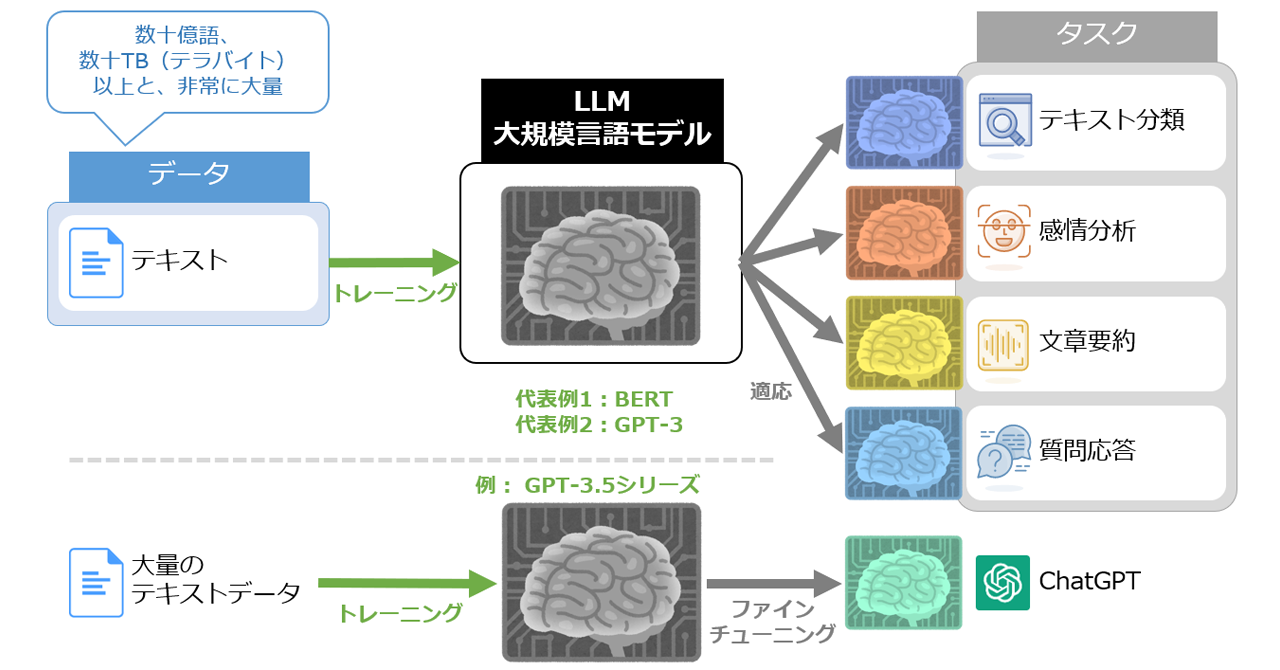



# **●TransformerとGPTについて（詳細は[こちら](https://qiita.com/Life-tech/items/5037a928bfaeb0d36720)を参照）**


**・Transformerとは何か？**

Transformerは、2017年にVaswaniらによって提案された自然言語処理（NLP）モデルのアーキテクチャで、「Attention is All You Need」という論文で発表されました。このアーキテクチャは、従来のRNN（リカレントニューラルネットワーク）やLSTM（Long Short-Term Memory）のようなシーケンシャル処理の代わりに、「自己注意機構（Self-Attention）」を使用することで、並列処理が可能になり、効率的に学習が行えるという特徴を持っています。

Transformerは以下の2つの主要な構造から成り立っています。

エンコーダ：入力データを処理し、内部表現を生成します。

デコーダ：エンコーダの出力を元に、新しいシーケンスを生成します（翻訳タスクなどに使用）

ところで、エンコーダーとデコーダーの意味とは何でしょう?
エンコーダーは、「入力データを理解して、意味を圧縮して表現する部分」です。例えば、文章をエンコーダーに入力すると、その文章が持つ意味を抽出し、重要な特徴をまとめます。

デコーダーは、「そのエンコーダーがまとめた「意味」を基に、新しいデータを生成したり、元のデータに戻す役割」をします。翻訳の例だと、エンコーダーが英語の文章を「意味」に変換し、デコーダーがその意味を使って日本語の文章を生成します。エンコーダーはデータを理解し、デコーダーはその理解を基に新しいデータを作る役割をします。※ここでは「暗号化」や「解読」とは少し違い、データの理解と再構成が中心となる考え方になるわけです。



**・GPTとは何か？**

GPTは、Transformerアーキテクチャのうち、デコーダ部分に焦点を当てて設計されたモデルです。OpenAIが開発したGPTシリーズ（GPT-1、GPT-2、GPT-3、GPT-4）は、Transformerのデコーダアーキテクチャを基にし、自然言語生成タスクに特化しています。

GPTは自己回帰型言語モデルで、次の単語を予測するタスクを繰り返し行うことで、文章を生成します。以下がGPTの重要な特徴です。

自己回帰モデル: GPTは「左から右に」次の単語を生成する自己回帰モデルです。つまり、与えられた単語列の次に来る単語を1つずつ予測し、最終的に文章全体を生成します。「自己回帰型モデル」というと、難しく聞こえるかもしれませんが、簡単に言うと「過去の情報を使って、次に何が来るかを予測する方法」です。たとえば、文章を作るとき、これまでに書いた単語を参考にして次の単語を予測していくような感じです。
GPTのようなモデルでは、文章を左から右に順番に見て、次に出てくる単語を一つずつ予測して文章を生成していきます。

事前学習とファインチューニング: GPTは大量のテキストデータで事前学習され、その後、特定のタスクにファインチューニングされることで、幅広いタスクに対応できます。

**・TransformerとGPTの関係性**

アーキテクチャの基盤: GPTは、Transformerのデコーダ部分に基づいており、その中心となるのが「自己注意機構（Self-Attention）」です。これにより、GPTは文脈を理解しながら次の単語を予測することができます。

方向性の違い: Transformerはエンコーダ・デコーダの両方を備えた構造ですが、GPTはデコーダのみを使ってテキスト生成を行います。エンコーダ部分はありません。

タスクの焦点: Transformerは翻訳などの双方向的なタスクにも対応できますが、GPTは自然言語生成に特化しています。

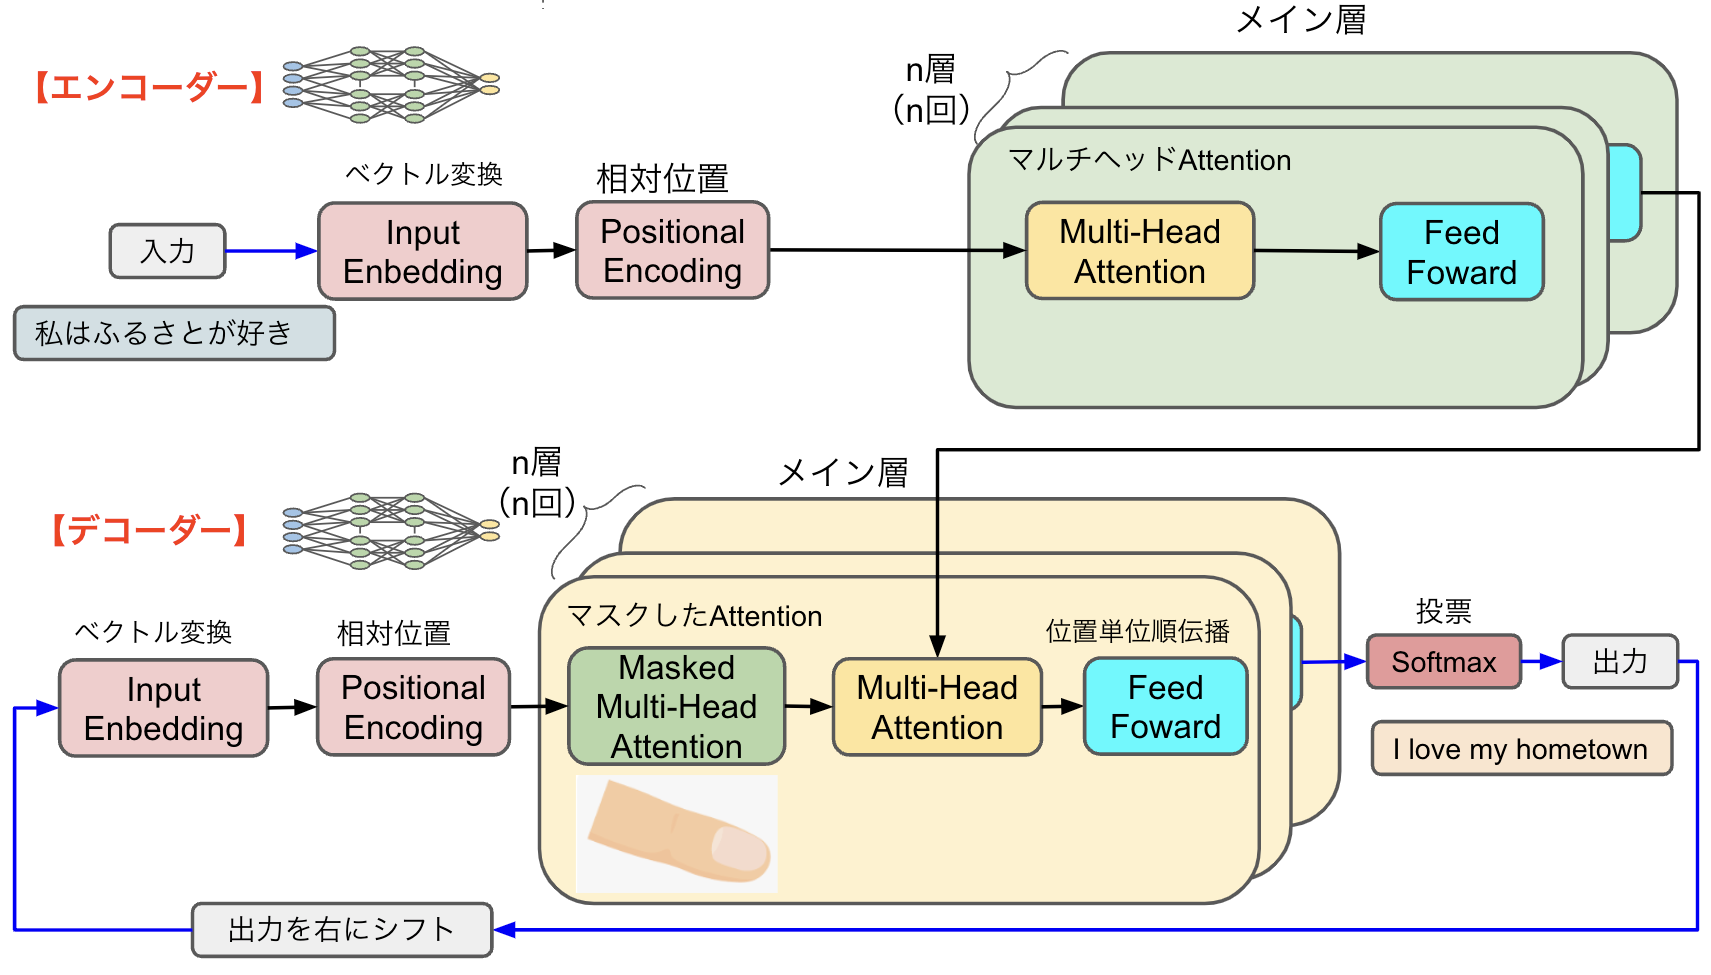


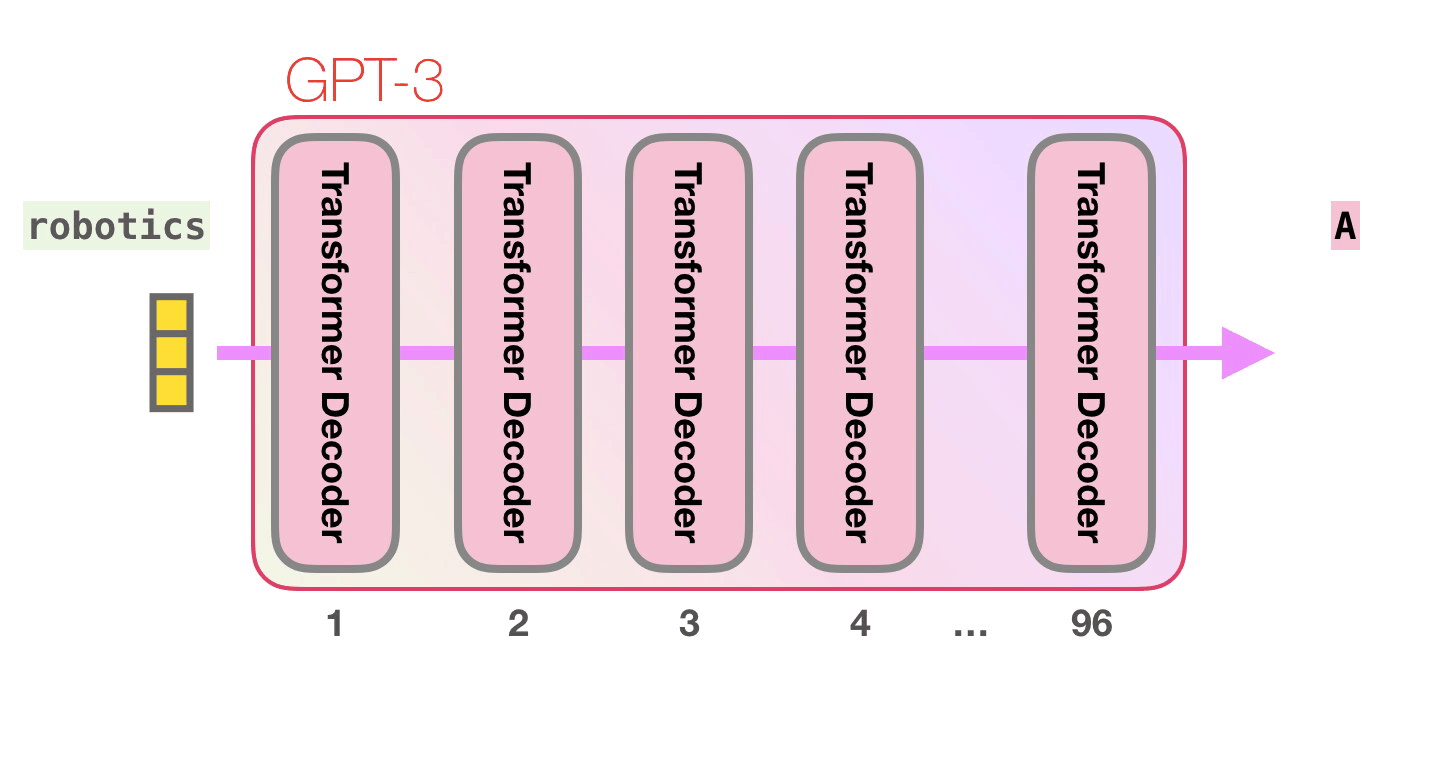



**●検索拡張生成（RAG）システムとは？**

以下では大規模言語モデル（LLM）の社会実装例としてのコーディングを検討するが、その際、利用するのが検索拡張生成（RAG）システムである。**RAGは実質的にLLMの社会実装例の大半を占めていると考えられているため、詳細に至るまで理解に努めておきたい。**

検索拡張生成（RAG）システムとは、Retrieval Augmented Generationの略で、大規模言語モデル（LLM）が外部のデータベースや検索エンジンから情報を取得し、それを基に回答を生成する技術です。日本語では「検索拡張生成」と呼ばれる。LLMの回答の精度や信頼性を向上させるために用いられる。

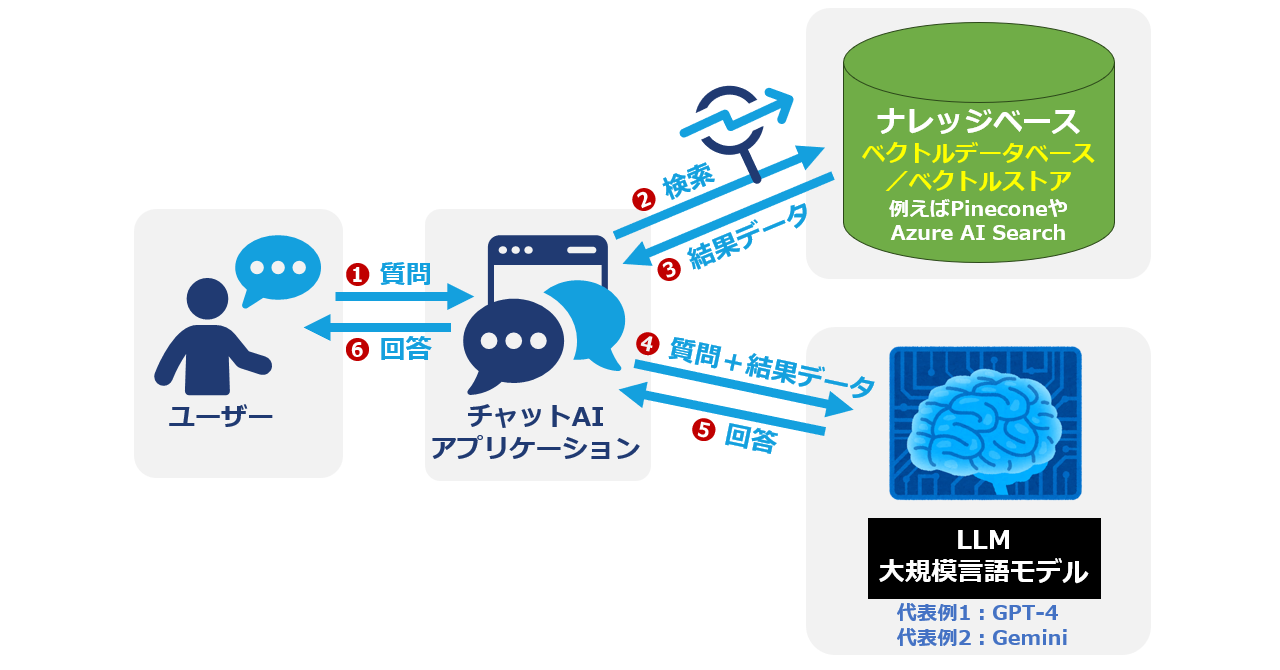


In [ ]:
#LLM/RAGの実装（その1）「LLMで松下幸之助を蘇らせる」

# OpenAIライブラリのインストール
!pip install --upgrade openai

# OpenAI APIキーの設定
import os
#以下には自己で取得したOPENAI API KEYを入力すること！
os.environ['OPENAI_API_KEY'] = "　"

# クライアントの初期化
from openai import OpenAI
client = OpenAI(api_key=os.environ.get('OPENAI_API_KEY'))



  
   


今回は、松下幸之助の残した言葉をcsvファイルにまとめたものを題材にしてみる。

*   [konosuke_words.xlsx](https://docs.google.com/spreadsheets/d/16jl7KFAyYZRxCYiibkDUjGIsMjxD7BH6OkScUXXpiSs/edit?usp=drive_link )  

*   [konosuke_words2.xlsx](https://docs.google.com/spreadsheets/d/1FSoT25MflDTllyQsAZLdXrdfRnEUb3dJTjK54HMOq-Q/edit?usp=drive_link)  

これらを開いて、Excelファイル(.xlsx) として保存すること。

In [ ]:
#関連ライブラリーをインストールする
#Langchainについてはこちらを参照→https://www.langchain.com/

!pip install langchain openai langchain_community chromadb tiktoken pandas openpyxl

In [ ]:
#先ほどのエクセルファイルからデータを読み込む

import pandas as pd
from langchain.document_loaders import CSVLoader

from google.colab import files
uploaded = files.upload()

In [ ]:
uploaded_2 = files.upload()

In [ ]:
#取得したテキストデータをベクトル化し、データベースを作成する。

import pandas as pd

# アップロードされたファイル名を取得
excel_path = next(iter(uploaded))
excel_path_2 = next(iter(uploaded_2))

# CSVファイルを読み込む
df = pd.read_excel(excel_path)
df_2 = pd.read_excel(excel_path_2)

print(f"ファイル：{list(uploaded.keys())[0]}のアップロードが完了しました。")
print(f"ファイル：{list(uploaded_2.keys())[0]}のアップロードが完了しました。")

df_combined = pd.concat([df, df_2], ignore_index=True)
df_clean = df_combined.dropna(subset=["content"])

print(df_clean)
print(f"データ件数：{len(df_clean)} 件")

In [ ]:
from langchain.docstore.document import Document

# 各行をLangChain Documentに変換
documents = [
    Document(
        page_content=row["content"],
        metadata={
            "title": row["title"],
            "url": row["url"],
            "source": row["source"]
        }
    )
    for _, row in df_clean.iterrows()
]

from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma

# OpenAIの埋め込み関数を初期化
embedding = OpenAIEmbeddings()

# ChromaDBにドキュメントをベクトル化して格納
db = Chroma.from_documents(documents, embedding, persist_directory="./chroma_db")

# 保存（必要に応じて）
db.persist()

In [ ]:
#意味の類似度に基づき、文章を取得する

query = "商売で一番大切なことは？" # ここを置き換えると質問を変更することができる
results = db.similarity_search(query, k=3)

for i, doc in enumerate(results, 1):
    print(f"=== 関連文書 {i} ===")
    print("タイトル:", doc.metadata["title"])
    print("URL:", doc.metadata["url"])
    print("出典:", doc.metadata["source"])
    print("内容:", doc.page_content[:300], "...\n")

In [ ]:
# query = "これまで一番苦労したことは何ですか？" # ここを置き換えると質問を変更することができる
# query = "これから日本はどうなってほしいですか？" # ここを置き換えると質問を変更することができる
# query = "商売で一番大切なことは？" # ここを置き換えると質問を変更することができる
query = "人生の後悔はありますか？" # ここを置き換えると質問を変更することができる

results = db.similarity_search(query, k=3)

reference = ""
for i, doc in enumerate(results, 1):
    reference += f"""
=== 関連文書 {i} ===
タイトル: {doc.metadata['title']}
URL: {doc.metadata['url']}
出典: {doc.metadata['source']}
内容: {doc.page_content}
    """

prompt = f"""
  あなたは松下幸之助です。
  以下の「# 問い」に、「# 参考文献」を踏まえながら答えてください。

  # 問い
  {query}

  # 参考文献
  {reference}
"""
response = client.chat.completions.create(
    model = "gpt-4.1-mini",
    messages = [
        {"role": "system", "content": prompt}
    ]
)
print("【回答】")
print(response.choices[0].message.content)
print("")
print(reference)

**【課題】**

以上で基礎的なRAGシステムの構築が完成し、それなりに精度の高いものが出来上がったことを目視で確認することが出来た。

しかしながら本当に「精度」が高いことを数理的に証明する、あるいは工学的に証明するためにはどうすれば良いのだろうか？LLMが生成する文書の正確さを測るための手段としてどの様なものがあるのかを調べ、実際に上記の「松下幸之助」の例を用いて適用してみよ。

**【課題】**

RAGシステムによる回答をより精緻なものにするための技術としてはどの様なものが提案されているかを調べ、列挙せよ。

また少なくともその1つを実際に利用し、本当により精緻な回答を引き出すことが出来たかどうかを論ぜよ。

**【課題】**

LLMを精緻なものとして利用するために使用される技術としてRAGシステム以外に、いわゆるファインチューニング（fine tuning）がある。この手法はどの様な手法であり、RAGシステムと比較してどの様な利点・マイナス点があるのか？調べて答えよ。

# **【統合課題】**

RAGシステムによって利用することが出来るのは最終的にテキストデータであるが、その前段階として音声データを利用することも考えられる。実際、いわゆる「デス・テック（death tech）」として利用される際には、「瀕死の人物」に文書をしたためさせることはほぼ不可能であり、音声データを取得するのが関の山ということもあり得る（参考として[こちら](https://www.nikkei.com/article/DGKKZO89534630S5A620C2TLF000/)を参照）。

そこで以下に示す「音声データからテキストデータを取得する」コードを参考にしつつ、任意の音声データに基づくRAGシステムを構築すると共に、出来る限り精緻な回答を引き出せるように工夫し、提示せよ。


In [ ]:
import os
from google.colab import files
from pydub import AudioSegment
import textwrap
import time
from openai import OpenAI

print("音声ファイルをアップロードしてください。")
uploaded = files.upload()

filename = next(iter(uploaded))

In [ ]:
with open(filename, "rb") as audio_file:
    # 文字起こし
    transcript = client.audio.transcriptions.create(
        model="whisper-1",
        file= audio_file
    )
print(transcript)

# **●補論：AIエージェントとエージェントAI**

上記で見てきたとおり大規模言語モデル（LLM）は社会実装の有効性という観点で非常に有用なものである。そうした中で昨今、単一のタスクをこなすLLMを用いた仕組みという意味での「AIエージェント」に加えて、複数のタスクについて有機的に連動させ、かつ自律的に作業をこなしていく「エージェントAI」に注目が集まっている。

今後、LLMはこの方向でさらに研究が進み、かつ社会実装が進んでいくものと思われる。この延長線上において論じられがちなのが「汎用人工知能（Artificial General Intelligence, AGI）」であるが、あくまでも現状の人工知能、さらにはLLMが従来型の「機械学習」の延長線上にあり、そこで行われているのはとどのつまり「パターンマッチング（pattern matching）」を過去データに基づき行っているのだということをあくまでも留意してもらいたい。

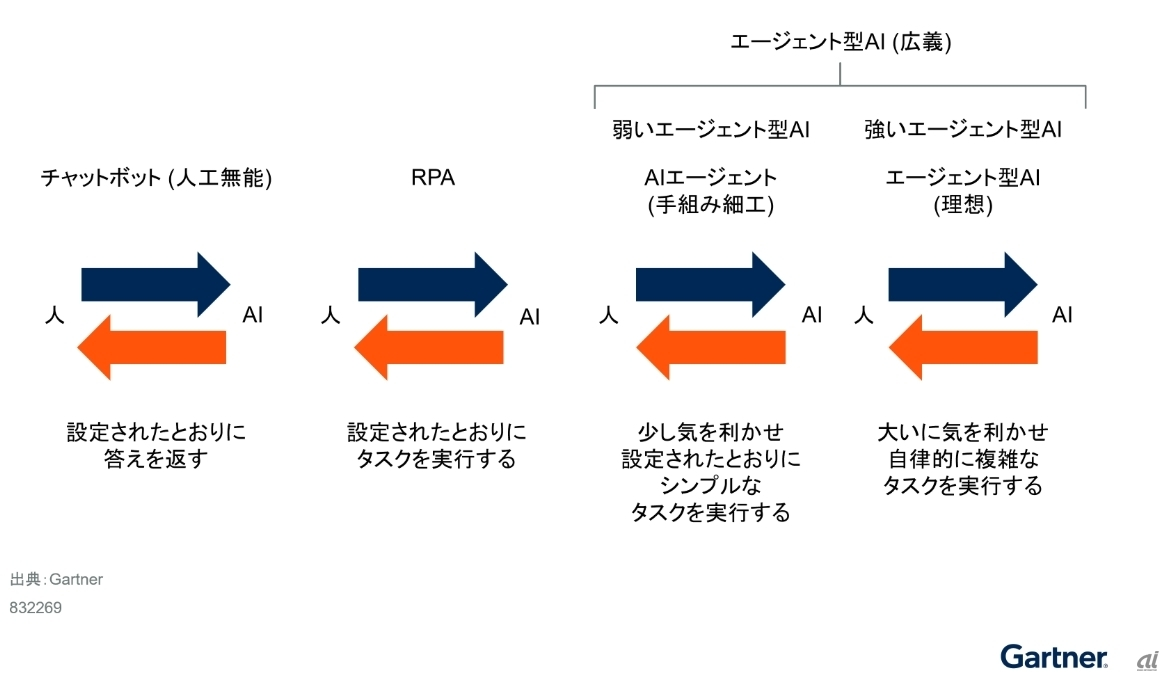

In [ ]:
#AIエージェントの例：我が国在外公館におけるYouTube上の世論動向調査（ドイツ連邦共和国を対象に）

#─ Google Colab 1セル完結版 ───────────────────────────────────────────────
# ドイツ（DE）国内アップロードのドイツ語YouTube動画を
# GPT-4.1 で日本に関する感情分析＆要旨作成・評価し、
# チャンネル登録者数・視聴回数・公開日も取得

#── ライブラリのインストール ──────────────────────────────────────────
!pip install --upgrade pip
!pip install --quiet google-api-python-client youtube-transcript-api openai pandas langdetect

#── インポートと API キー設定 ───────────────────────────────────────────
import os, json
from datetime import datetime, timedelta
import pandas as pd
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from youtube_transcript_api import YouTubeTranscriptApi
from langdetect import detect
from openai import OpenAI

# ご自身のキーに置き換えてください
#ここにYOUTUBE API KEYを入れること
os.environ["YOUTUBE_API_KEY"] = "　"
#ここにOPEN API KEYを入れること
os.environ["OPENAI_API_KEY"]  = " "

YOUTUBE_API_KEY = os.environ["YOUTUBE_API_KEY"]
OPENAI_API_KEY  = os.environ["OPENAI_API_KEY"]

# OpenAI client (>=1.0.0 interface)
client = OpenAI(api_key=OPENAI_API_KEY)

# YouTube API client
youtube = build("youtube", "v3", developerKey=YOUTUBE_API_KEY)

#── 検索クエリと期間設定 ──────────────────────────────────────────────────
search_query    = 'Japan OR Tokio OR Ishiba OR Kaiser OR "Osaka Expo" OR "Kansai Expo"'
published_after = (datetime.utcnow() - timedelta(days=180)).isoformat("T") + "Z"
relevant_terms  = ["Japan", "Tokio", "Osaka", "Ishiba", "Kaiser"]

#── 動画IDを取得 ───────────────────────────────────────────────────────────
def search_videos(q, published_after, max_results=50, max_pages=10):
    ids, token = set(), None
    for _ in range(max_pages):
        try:
            res = youtube.search().list(
                part="id", q=q, type="video",
                publishedAfter=published_after,
                relevanceLanguage="de", regionCode="DE",
                maxResults=max_results, pageToken=token
            ).execute()
        except HttpError as e:
            if e.resp.status == 403:
                print("YouTube API quota exceeded.")
                break
            raise
        for it in res.get("items", []):
            ids.add(it["id"]["videoId"])
        token = res.get("nextPageToken")
        if not token:
            break
    return list(ids)

#── ドイツ語判定 ────────────────────────────────────────────────────────
def is_german(text):
    try:
        return detect(text) == "de"
    except:
        return False

#── 字幕を取得 ─────────────────────────────────────────────────────────
def get_transcript(vid):
    try:
        segs = YouTubeTranscriptApi.get_transcript(vid, languages=["de"])
        return "\n".join(s["text"] for s in segs)
    except:
        return None

#── 感情分析・根拠翻訳・要旨作成 ─────────────────────────────────────────────
def analyze_and_summarize(txt):
    # (1) ポジ/ネガ ラベル
    resp1 = client.chat.completions.create(
        model="gpt-4.1",
        messages=[
            {"role":"system","content":
             "あなたは感情分析アシスタントです。以下のドイツ語テキストが日本に対して肯定的なら'P'、否定的なら'N'とだけ答えてください。"},
            {"role":"user","content":txt}
        ]
    )
    label = resp1.choices[0].message.content.strip()

    # (2) 根拠文（ドイツ語）
    resp2 = client.chat.completions.create(
        model="gpt-4.1",
        messages=[
            {"role":"system","content":
             "評価の根拠として使われたドイツ語の一文を抽出してください。"},
            {"role":"user","content":txt}
        ]
    )
    evidence_de = resp2.choices[0].message.content.strip()

    # (3) 根拠文の日本語翻訳
    resp3 = client.chat.completions.create(
        model="gpt-4.1",
        messages=[
            {"role":"system","content":
             "以下のドイツ語文を正確に日本語に翻訳してください。"},
            {"role":"user","content":evidence_de}
        ]
    )
    evidence_jp = resp3.choices[0].message.content.strip()

    # (4) 全体要旨（日本語・200字以内）
    resp4 = client.chat.completions.create(
        model="gpt-4.1",
        messages=[
            {"role":"system","content":
             "以下のドイツ語テキスト全体を日本語で200文字以内に要約してください。"},
            {"role":"user","content":txt}
        ],
        max_tokens=300
    )
    summary = resp4.choices[0].message.content.strip()

    return label, evidence_jp, summary

#── 要旨の品質評価 ───────────────────────────────────────────────────────
def evaluate_summary(summary):
    system_msg = (
        "あなたは要約評価アシスタントです。"
        "以下の7項目について必ず純粋なJSONオブジェクトでのみ"
        "整数0～10を値として返してください。"
        "\n1. 文脈の関連性\n"
        "2. 回答の忠実性\n"
        "3. 回答の関連性\n"
        "4. ノイズへの頑健性\n"
        "5. 回答不可能な質問の却下\n"
        "6. 情報の統合\n"
        "7. 反事実への頑健性\n"
    )
    user_msg = f"要旨:\n{summary}"
    resp = client.chat.completions.create(
        model="gpt-4.1",
        messages=[
            {"role":"system","content":system_msg},
            {"role":"user","content":user_msg}
        ]
    )
    content = resp.choices[0].message.content.strip()
    # JSON 部分を抽出
    try:
        start = content.index('{')
        end   = content.rindex('}') + 1
        json_str = content[start:end]
        return json.loads(json_str)
    except Exception:
        # 解析失敗時はデフォルト値を返す
        keys = ["文脈の関連性","回答の忠実性","回答の関連性",
                "ノイズへの頑健性","回答不可能な質問の却下",
                "情報の統合","反事実への頑健性"]
        return {k: 0 for k in keys}

#── メイン処理 ────────────────────────────────────────────────────────────
results = []
video_ids = search_videos(search_query, published_after)

for i in range(0, len(video_ids), 50):
    batch = video_ids[i:i+50]
    try:
        vid_res = youtube.videos().list(
            part="snippet,statistics",
            id=",".join(batch)
        ).execute()
    except HttpError as e:
        if e.resp.status == 403:
            print("Quota exceeded for videos.list.")
            break
        raise

    for item in vid_res.get("items", []):
        vid    = item["id"]
        snip   = item["snippet"]
        stats  = item.get("statistics", {})
        title  = snip.get("title","")
        desc   = snip.get("description","")
        ch_id  = snip.get("channelId")
        views  = int(stats.get("viewCount",0))
        date   = snip.get("publishedAt","")[:10]

        txt = get_transcript(vid)
        if not txt or not is_german(txt):
            continue
        if not any(term in (title + desc + txt) for term in relevant_terms):
            continue

        lbl, evidence_jp, summary = analyze_and_summarize(txt)
        scores = evaluate_summary(summary)

        try:
            ch_res = youtube.channels().list(
                part="statistics", id=ch_id
            ).execute()
            subs   = int(ch_res["items"][0]["statistics"].get("subscriberCount",0))
        except:
            subs = 0

        results.append({
            "タイトル":                title,
            "URL":                     f"https://youtu.be/{vid}",
            "感情分析":                "positive" if lbl=="P" else "negative",
            "根拠テキスト(日本語)":     evidence_jp,
            "要旨(200字以内)":          summary,
            "視聴回数":                views,
            "チャンネル登録者数":      subs,
            "公開日":                  date,
            **scores
        })

#── DataFrame 表示 ─────────────────────────────────────────────────────
df = pd.DataFrame(results)
df